# Reproduce SVA Yeast analysis

I attempt the reproduce the analysis in the SVA paper on the yeast data set. The goal would have been to reproduce figure 3 of the SVA paper.
 
![Fig 3](sva_fig3.png)

There are a few loci that influence the expression of many genes. The SVA corrected plot has many of the trans associations removed because SVA is captureing these effects.

## Data

Brem RB, Yvert G, Clinton R, Kruglyak L (2002) Genetic dissection of transcriptional regulation in budding yeast. Science 296: 752–755.RB BremG. YvertR. ClintonL. Kruglyak2002Genetic dissection of transcriptional regulation in budding yeast.Science296752755 

The data was publicly available on GEO (GSE1990)

Gene expression was measured using a cDNA microarray. In the data provided there was a matrix of values which from what I gather is a normalized ratio of the intensities of two dyes which are used to stain experimental and control cDNA. Then they are matched to different loci on a chip. Across these experiments they used the lab strain of yeast BY4716 as the reference

The summarized microarray data was easy to find. More difficult to track down was the "genotype data". After digging through a number of papers published by Brem et al it turns out that they used they constructed there own set of markers from the microarray data (still trying to figure out how). So I downloaded all of the individual arrays too

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data_path = 'GSE1990_series_matrix.txt'
data = pd.read_csv(data_path, skiprows=69, delimiter='\t', comment='#', index_col=0)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data = data.dropna(axis=0, how='all')

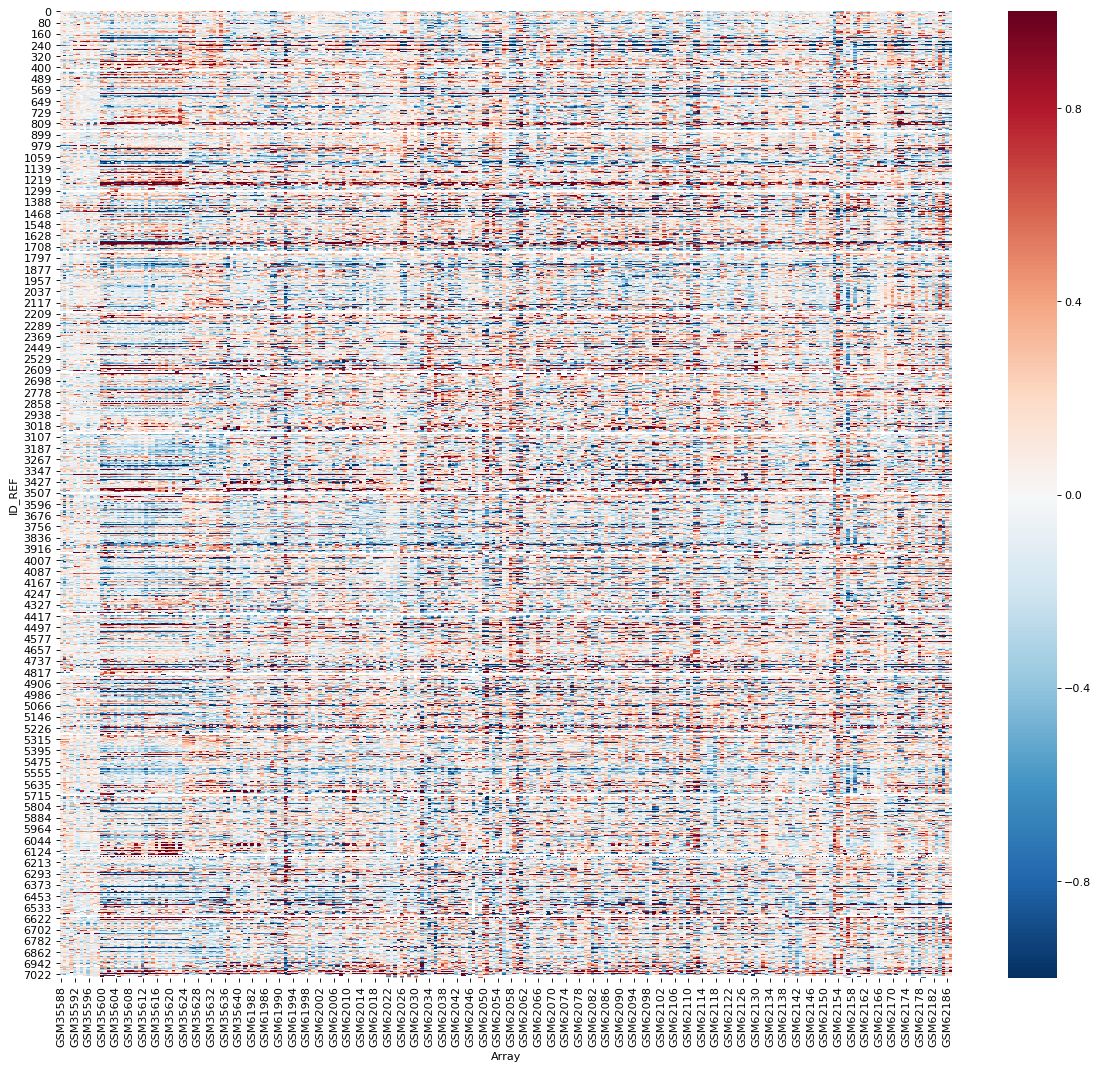

In [5]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(data, cmap='RdBu_r', vmin=-1, vmax=1)
plt.xlabel('Array')

In [6]:
annot_path = 'GPL118.annot'
annotation = pd.read_csv(annot_path, sep='\t',header=27, index_col=0)

In [7]:
annotation.columns

Index(['Gene title', 'Gene symbol', 'Gene ID', 'UniGene title',
       'UniGene symbol', 'UniGene ID', 'Nucleotide Title', 'GI',
       'GenBank Accession', 'Platform_CLONEID', 'Platform_ORF',
       'Platform_SPOTID', 'Chromosome location', 'Chromosome annotation',
       'GO:Function', 'GO:Process', 'GO:Component', 'GO:Function ID',
       'GO:Process ID', 'GO:Component ID'],
      dtype='object')

In [8]:
soft_path = 'GSE1990_family.soft'

names = {}
arrays = {}

n = 7416

while (n < len(lines)):
    sample_id = lines[n].strip().split(' = ')[1]
    sample_title = lines[n+1].strip().split(' = ')[1]
    
    print(sample_id)

    # get number of rows
    while '!Sample_data_row_count' not in lines[n]:
        n += 1

    nrows = int(lines[n].strip().split(' = ')[1])

    while '!sample_table_begin' not in lines[n]:
        n += 1

    header = n + 1
    
    names[sample_title] = sample_id
    arrays[sample_id] = pd.read_csv(soft_path, header=header, nrows=nrows, sep='\t', index_col=0)
    
    n = header + nrows + 2

NameError: name 'lines' is not defined


## Step 1: Making the markers

In the original study, a set of markers was selected by the following procedure described in the supplement. A list of markers doesn't seem to be published anywhere.

### Procedure

http://science.sciencemag.org/content/296/5568/752

Genetic Dissection of Transcriptional Regulation in Budding Yeast, Supplement

Probe pairs that serve as good genetic markers were selected as follows. First, data from 3 hybridization experiments for each parent strain were filtered by removing probe pairs with saturated intensity (> 40,000 units) on any chip, and probe pairs with a low perfect match (pm) intensity (< 3,500 units) or a low difference between pm and mismatch (mm) intensities ( <_2000 units="units" in="in" any="any" by="by" experiment.="experiment." all="all" further="further" analyses="analyses" were="were" performed="performed" on="on" logpm="logpm" mm="mm" values.="values." to="to" correct="correct" for="for" global="global" chip="chip" effect="effect" each="each" distribution="distribution" was="was" centered="centered" subtracting="subtracting" its="its" mode.="mode." following="following" efron="efron" et="et" al.="al." em="em">1) we formed two scores for each probe pair: Z = D / (A + S), and z = d / (a + s), where D is the average of the 3 differences BYj - RMj (j = 1 to 3), S is their standard deviation, and A is the 90th percentile of all S values; d is the average of the four differences BY2 - BY1, BY3 - BY2, RM2 - RM1, RM3 - RM2, s is their standard variation, and a is the 90th percentile of all s values. As expected, we observed that the Z distribution was skewed toward high values compared to the z distribution, and we selected 6444 probe pairs with Z>0.5 (only 75 probe pairs had a higher z). For these probe pairs, we analyzed all 49 DNA hybridization experiments (3 for each parent, 4 for a tetrad, and 39 for additional segregants). We removed probe pairs having missing values in more than 10 experiments, normalized log(pm/mm) values by dividing by the mode of their distribution, and for each probe pair, performed k-means clustering (k = 2) of the experiments. Probes were retained when this clustering separated the parental scores (all BY chips in the "high" cluster, all RM chips in the "low" cluster). 4702 probe pairs remained after this step. For each of these, a gaussian distribution was fitted to each of the 2 clusters and the probability of having a BY origin given a score x was computed as pBY = H(x) / ( L(x) + H(x) ), where L(x) and H(x) are the probabilities of drawing x from the gaussians fitted to the low and high clusters, respectively. Genotypes were called as follows: "BY" if pBY > 0.965, "RM" if pBY < 0.035, "ambiguous" otherwise. The list of markers was then filtered to remove probe pairs with more than 10 ambiguous genotypes, probe pairs with <_2 instances="instances" of="of" either="either" genotype="genotype" in="in" the="the" _43="_43" segregants="segregants" which="which" is="is" highly="highly" unlikely="unlikely" under="under" random="random" segregation="segregation" and="and" probe="probe" pairs="pairs" corresponding="corresponding" to="to" ty="ty" elements="elements" because="because" their="their" exact="exact" location="location" unknown="unknown" strains="strains" used.="used." finally="finally" _16="_16" markers="markers" were="were" removed="removed" genetic="genetic" map="map" cross="cross" disagreed="disagreed" with="with" physical="physical" location.="location." genotypes="genotypes" used="used" linkage="linkage" analysis="analysis" based="based" on="on" resulting="resulting" _3312="_3312" markers.="markers." corrected="corrected" when="when" they="they" disagreement="disagreement" two="two" flanking="flanking" located="located" within="within" _20kb="_20kb" _7cm.p="_7cm.p">
Reference 


### Attempt

For the life of me I cannot find out how where these "perfect match" and "mismatch" intensities come from, so I am forced to skip this filtering step.

For the second step we need to data from 3 hypbridization experiments for each parent. There seem to be two arrays for each experiment one labeled Cy3, the other Cy5. I don't understand why they are labeled like this because each array on its own has one Cy3 channel and one Cy5 channel, since these are the names of the contrasting dyes that are used.

Next is asks us to compute "D is the average of the 3 differences BYj - RMj (j = 1 to 3)", they do not say what difference to take, I assume it' the "value" log ratio of the two contrasting die intensities.

In [ ]:
BY_parents = [names[n] for n in ['By1Cy5', 'By2Cy5', 'BY4Cy5']]
RM_parents = [names[n] for n in ['RM1Cy5_1','RM2Cy5_1', 'RM4Cy5_1']]

In [ ]:
D = (data[BY_parents].sum(axis=1) - data[RM_parents].sum(axis=1)) / 3


In [ ]:
S = np.std(data[BY_parents].as_matrix() - data[RM_parents].as_matrix(), axis=1)
S2 = S[~np.isnan(S)]  # a lot of Nan values, I filter them out in this percentile calculations

In [ ]:
A = np.sort(S2)[int(S2.size * 0.9)]

In [ ]:
Z = D / (A + S)

In [ ]:
d = data[BY_parents[1]] - data[BY_parents[0]] + data[BY_parents[2]] - data[BY_parents[1]] + \
    data[RM_parents[1]] - data[RM_parents[0]] + data[RM_parents[2]] - data[RM_parents[1]]
    
d = d/4

s = np.std(
    np.stack([data[BY_parents[1]] - data[BY_parents[0]], data[BY_parents[2]] - data[BY_parents[1]],
    data[RM_parents[1]] - data[RM_parents[0]], data[RM_parents[2]] - data[RM_parents[1]]]),
    axis=0
     )

s2 = s[~np.isnan(s)]
a = np.sort(s2)[int(s2.size * 0.9)]

z = d / (a + s)

In [ ]:
Z.hist(bins=100)
z.hist()

The orange is z, the blue is Z.

Brem writes "As expected, we observed that the Z distribution was skewed toward high values compared to the z distribution, and we selected 6444 probe pairs with Z>0.5 (only 75 probe pairs had a higher z)"

This doesn't really seem to be the case. We can't really follow there procedure of selecting probes with Z > 0.5, that would leave us with only ~1000 probes, far less than the ~6000 reported

In [ ]:
# filter out probes with > 10 missing values across all experiments
data = data.iloc[(np.isnan(data).sum(axis=1) <= 10).as_matrix()]

### Kmeans

Next, they use kmeans to select probes with values that completely seperate the parent strains.

Sklearns kmeans doesnt seem to handle Nan so I'm just going to impute them with the mean value. Might make more sense to do imputation for each parent strain seperately but I'm running out of time so...

In [ ]:
from sklearn.preprocessing import Imputer

In [ ]:
imp = Imputer(strategy='mean', axis=1).fit_transform(data)
data.iloc[:, :] = imp

In [ ]:
BY_parents = [names[n] for n in ['By1Cy5', 'By2Cy5', 'BY3Cy5', 'BY4Cy5', 'BY5Cy5', 'BY6Cy5']]
RM_parents = [names[n] for n in ['RM1Cy5_1', 'RM2Cy5_1', 'RM3Cy5_1', 'RM4Cy5_1', 'RM5Cy5', 'RM6Cy5', 'RM3Cy5_2', 'RM4Cy5_2', 'RM1Cy5_2', 'RM2Cy5_2', 'RM3Cy5_3', 'RM4Cy5_3']]

In [ ]:
def do_kmeans(x, g1, g2, idx):
    kmeans = KMeans(n_clusters=2).fit(x.values.reshape(-1, 1))
    Q = pd.Series(kmeans.predict(x.values.reshape(-1, 1)), index=idx)
    result = (np.all(Q.loc[g1] == 0) and np.all(Q.loc[g2] == 1)) or (np.all(Q.loc[g1] == 1) and np.all(Q.loc[g2] == 0))
    return result

data['kmeans'] = data.apply(lambda x: do_kmeans(x, BY_parents, RM_parents, data.columns), axis=1)

In [ ]:
data.kmeans.sum()

### Problem

So here we have that ~300 of the probes can be used to completely seperate the parent strains, much less than the ~3000 reported. I am almost certain I am doing something wrong.

## Time's Up!

I got caught up trying to create this set of markers. It's a little surprising to me that we can call genotype like this. I think this process was made more complicated because the way the data is labeled doesn't really seem to match the information they say they were using in the supplement. Further, the process described for filtering is tremendously unclear to me.

I don't really know how to work with this data. There are a bunch of arrays for each parent strain-- I made the decision to use just the ones labeled Cy5 values because there seemed to be corresponding Cy5 and Cy3 arrays but the values in each seemed to have little in common.